In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_val_score, train_test_split
import string
from nltk.stem.snowball import EnglishStemmer
from nltk.corpus import stopwords
from nltk.stem import porter
from nltk.stem.util import suffix_replace, prefix_replace
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk import SnowballStemmer
import unicodedata
import datetime
import geopandas as gpd
from shapely.geometry import Point, Polygon


from sklearn.decomposition import NMF as NMF_sklearn

In [2]:
final_df = pd.read_json('/Users/lesropro/the_dive/DATAthon/poller_opposites_election_hackathon/ignorefiles/clean_df.json')

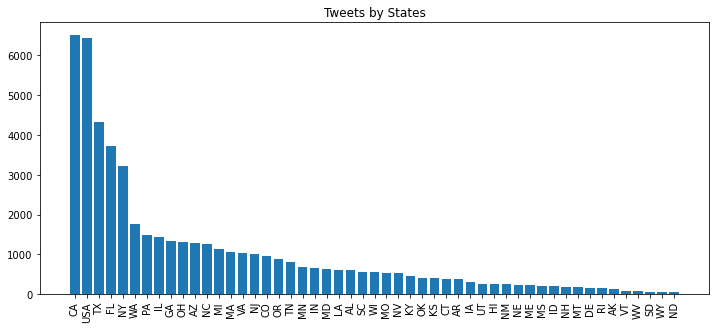

In [6]:
data_plot = final_df.groupby(['clean_loc']).count()['location'].sort_values(ascending=False)
plt.figure(figsize=(12,5))
plt.bar(height=data_plot, x=data_plot.index)
plt.xticks(rotation=90)
plt.title('Tweets by States')
plt.savefig('/Users/lesropro/the_dive/DATAthon/poller_opposites_election_hackathon/images/tweet.png');


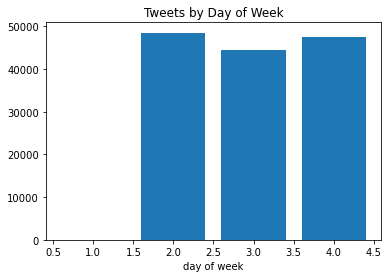

In [13]:
plt.bar(height=final_df.groupby(['dayofweek']).count()['location'], x=final_df.groupby(['dayofweek']).count().index)
plt.title('Tweets by Day of Week')
plt.xlabel('day of week')
plt.savefig('/Users/lesropro/the_dive/DATAthon/poller_opposites_election_hackathon/images/tweetdow.png');

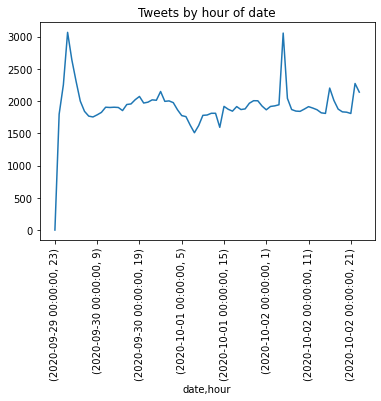

In [14]:
final_df.groupby(['date','hour']).count()['location'].plot()
plt.xticks(rotation=90)
plt.title('Tweets by hour of date')
plt.savefig('/Users/lesropro/the_dive/DATAthon/poller_opposites_election_hackathon/images/tweethourofday.png');

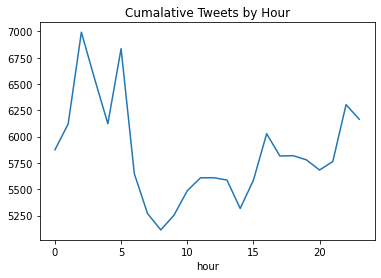

In [15]:
final_df.groupby(['hour']).count()['location'].plot()
plt.title('Cumalative Tweets by Hour')
plt.savefig('/Users/lesropro/the_dive/DATAthon/poller_opposites_election_hackathon/images/cumatweetbyhour.png');

In [16]:
plt.bar(height=final_df.groupby(['user_name']).count()['location'].sort_values(ascending=False).head(2),x=final_df.groupby(['user_name']).count()['location'].sort_values(ascending=False).head(20).index)
plt.xticks(rotation=90)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

In [18]:
final_df.groupby('user_name').sum()['retweet_count'].sort_values(ascending=False)

user_name
Cryptan_         843892
Alexxandra100    547255
M_Jarvi          547254
CPetkoff         543215
SGC21314138      537907
                  ...  
jamaistd              0
jama1176              0
jam_gran              0
jalla_peno            0
TryDigi               0
Name: retweet_count, Length: 121039, dtype: int64

In [19]:
final_df[final_df['user_name']=='realDonaldTrump']

,Unnamed: 0,created_at,full_text,user,retweet_count,favorite_count,lang,retweeted_status,clean_text,description,location,language,followers,friends,user_name,device,hour,dayofweek,date,clean_loc
48781,48781,2020-10-01 00:07:28,So when will something significant happen to J...,"{'id': 25073877, 'id_str': '25073877', 'name':...",37297,148878,en,None,so when will someth signific happen to jame co...,45th President of the United States of America🇺🇸,"Washington, DC",on,8732192,,realDonaldTrump,iPhone,0,3,2020-10-01,WA
54654,54654,2020-10-01 02:59:02,"100,000 DEFECTIVE BALLOTS IN NEW YORK. THEY WA...","{'id': 25073877, 'id_str': '25073877', 'name':...",51146,189361,en,None,100000 defect ballot in new york they want to ...,45th President of the United States of America🇺🇸,"Washington, DC",on,8732191,,realDonaldTrump,iPhone,2,3,2020-10-01,WA


In [21]:
final_df[final_df['user_name']=='JoeBiden']

,Unnamed: 0,created_at,full_text,user,retweet_count,favorite_count,lang,retweeted_status,clean_text,description,location,language,followers,friends,user_name,device,hour,dayofweek,date,clean_loc
